In [310]:
import pandas as pd
from matplotlib import pyplot as plt

In [312]:
fotunedf = pd.read_csv(r'./sample_data/Fortune 500 Companies.csv')

In [313]:
fotunedf.head()

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
fortunedf.shape

(3778, 16)

In [315]:
#Dropping rows with missing value
fortunedf.dropna(inplace=True)

In [ ]:
fortunedf.duplicated().value_counts()
fortunedf.duplicated().sum()

In [ ]:
fortunedf.info()

In [319]:
fortunedf.name= fortunedf.name.astype('string')
fortunedf.industry = fortunedf.industry.astype('string')
fortunedf.sector = fortunedf.sector.astype('string')
fortunedf.headquarters_state = fortunedf.headquarters_state.astype('string')
fortunedf.headquarters_city = fortunedf.headquarters_city.astype('string')
fortunedf.employees = fortunedf.employees.astype('int64')
fortunedf.founder_is_ceo = fortunedf.founder_is_ceo.astype('string')
fortunedf.female_ceo = fortunedf.female_ceo.astype('string')
fortunedf.newcomer_to_fortune_500 = fortunedf.newcomer_to_fortune_500.astype('string')
fortunedf.global_500 = fortunedf.global_500.astype('string')

In [320]:
fortunedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 9940 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   name                     3778 non-null   string
 1   rank                     3778 non-null   int64 
 2   year                     3778 non-null   int64 
 3   industry                 3778 non-null   string
 4   sector                   3778 non-null   string
 5   headquarters_state       3778 non-null   string
 6   headquarters_city        3778 non-null   string
 7   market_value_mil         3778 non-null   int64 
 8   revenue_mil              3778 non-null   int64 
 9   profit_mil               3778 non-null   int64 
 10  asset_mil                3778 non-null   int64 
 11  employees                3778 non-null   int64 
 12  founder_is_ceo           3778 non-null   string
 13  female_ceo               3778 non-null   string
 14  newcomer_to_fortune_500  3778 non-nu

# **Data Analysis**

In [321]:
companyemployees = fortunedf[['name','employees']].groupby(['employees'],as_index=False)

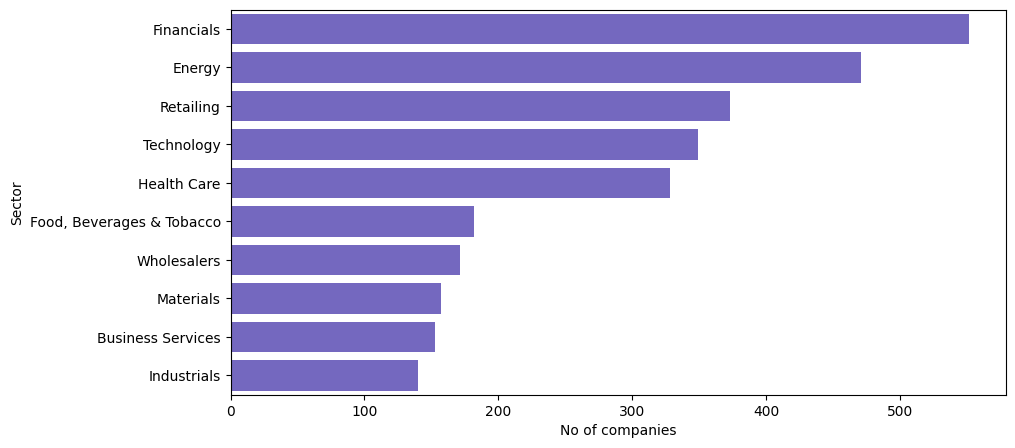

In [384]:
# The distribution of companies by sector
import seaborn as sns
x1 = fortunedf['sector'].value_counts().nlargest(10).index
y1= fortunedf['sector'].value_counts().nlargest(10).values
plt.figure(figsize=(10,5))
sns.barplot(x=y1,y=x1,color='slateblue')
plt.xlabel('No of companies')
plt.ylabel('Sector')
plt.show()

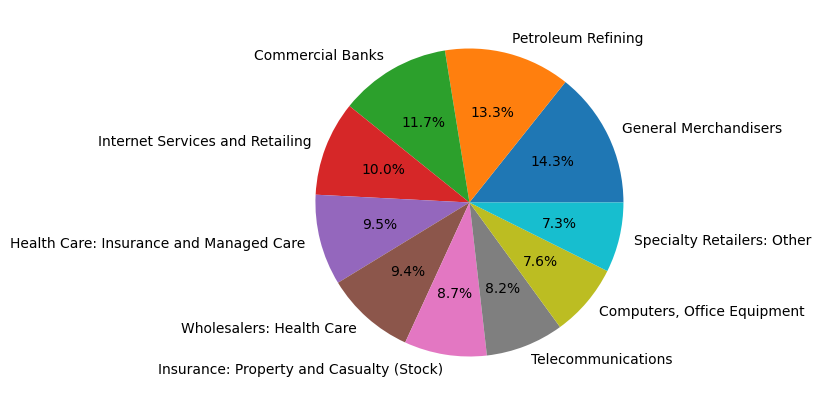

In [336]:
#distribution of revenue by industry
x = fortunedf.groupby(['industry'])['revenue_mil'].sum().nlargest(10).index
y = fortunedf.groupby(['industry'])['revenue_mil'].sum().nlargest(10).values
plt.figure(figsize=(7,5))
plt.pie(y,labels=x, autopct='%1.1f%%')
plt.show()

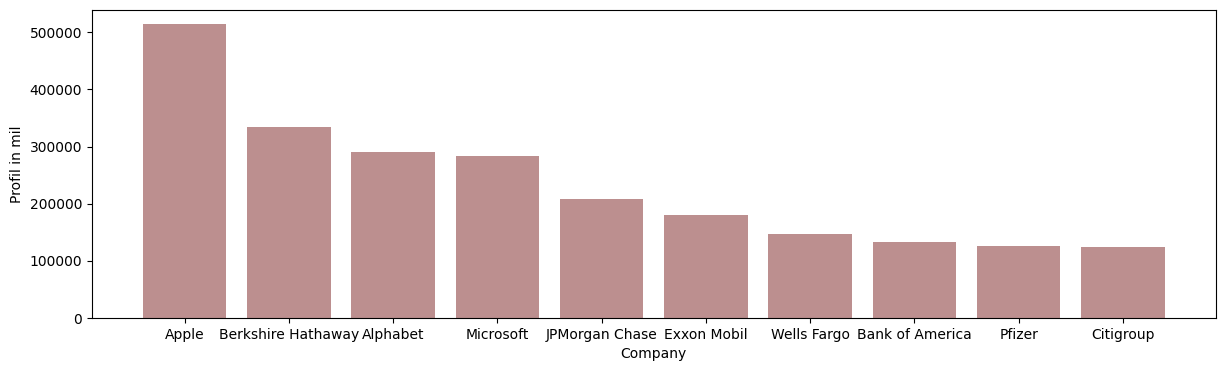

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [382]:
#Top 10 companies by Total profit of Fortune 500 Companies
x = fortunedf.groupby(['name'])['profit_mil'].sum().nlargest(10).index
y = fortunedf.groupby(['name'])['profit_mil'].sum().nlargest(10).values
plt.figure(figsize=(14.5,4))
plt.bar(x,y,color ='rosybrown' )
plt.xlabel('Company')
plt.ylabel('Profil in mil')
plt.show()
plt.legend

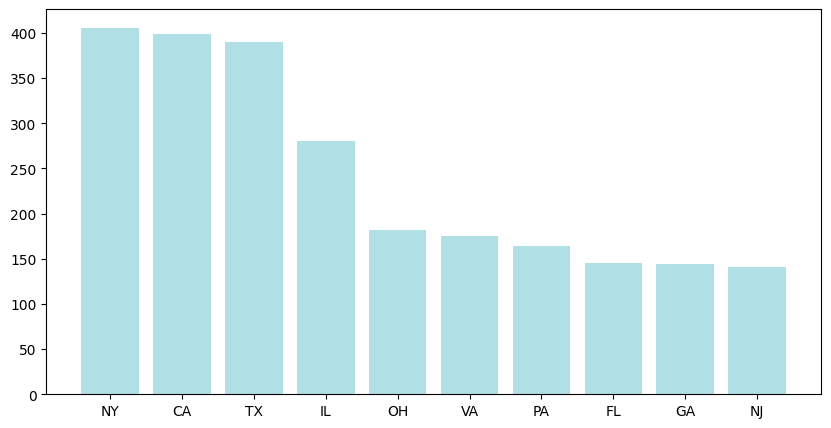

In [380]:
# The distribution of companies by state
state_counts = fortunedf['headquarters_state'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
x=state_counts.index
y=state_counts.values
plt.bar(x,y,color='powderblue')
plt.legend
plt.show()

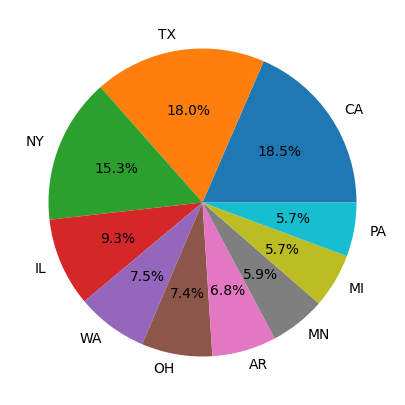

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [385]:
# The distribution of revenue by state
state_revenue = fortunedf.groupby(['headquarters_state'])['revenue_mil'].sum().nlargest(10)
x=state_revenue.index
y=state_revenue.values
plt.figure(figsize=(7,5))
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()
plt.legend

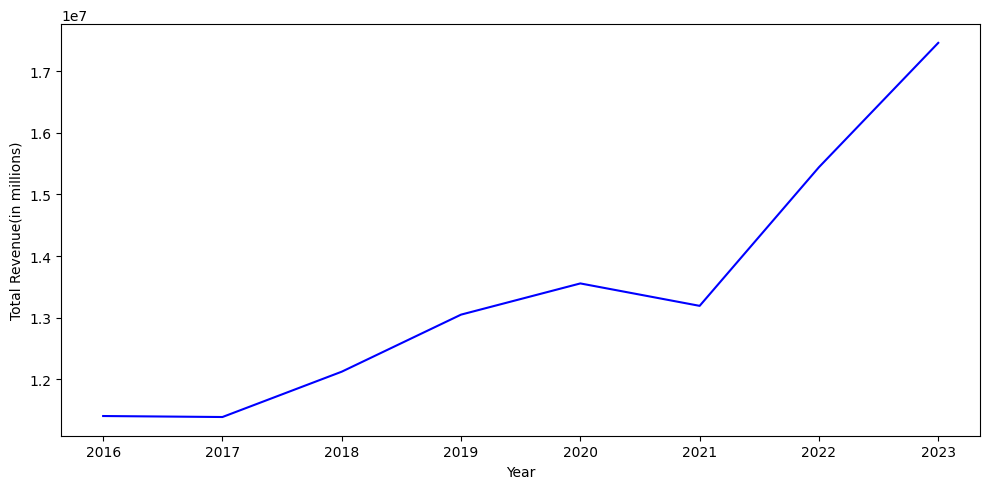

In [378]:
# 5. The trend of the total revenue of the Fortune 500 companies over the years
yearly_total_revenue = fortunedf.groupby(['year'])['revenue_mil'].sum()
plt.figure(figsize=(9,5))
sns.lineplot(x=yearly_total_revenue.index,y=yearly_total_revenue.values,color='b')
plt.xlabel('Year')
plt.ylabel('Total Revenue(in millions)')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

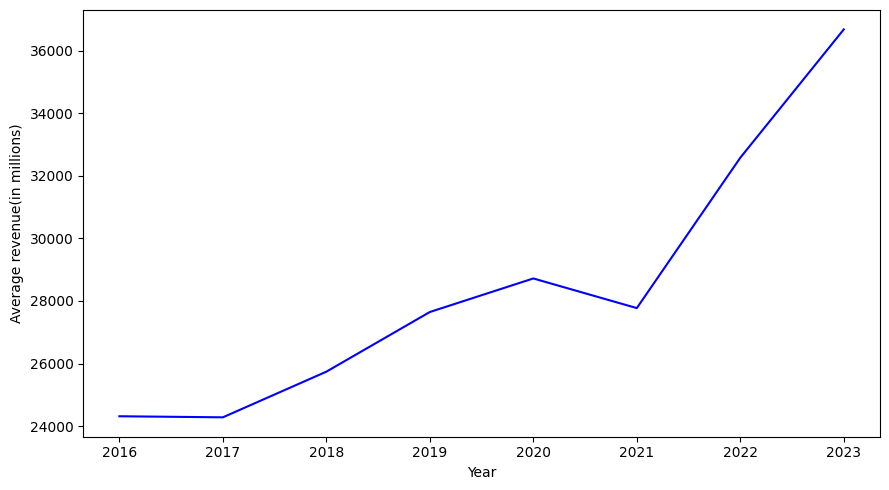

In [383]:
#The trend of the average revenue of the Fortune 500 companies over the years
yearly_avg_revenue = fortunedf.groupby(['year'])['revenue_mil'].mean()
plt.figure(figsize=(9,5))
sns.lineplot(x=yearly_avg_revenue.index, y= yearly_avg_revenue.values, color='b')
plt.xlabel('Year')
plt.ylabel('Average revenue(in millions)')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()